In [194]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('C:/Users/lmars/Documents/MIAA/Embedded Systems/Enmanuel/Recyclable-Materials-Classification-Arduino/Project/project.csv')

# Display the contents of the CSV file
# df.head()

# Shuffle the data
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Transparencia,giroscopio X,giroscopio Y,Vermelho,Verde,Azul,Branco,Label
0,52,633,624,2,3,3.0,10,Super Bock Zero%Alc Vidro
1,51,643,610,3,3,5.0,12,Super Bock Zero%Alc Vidro
2,462,357,291,2,2,2.0,6,Super Bock Mini Vidro
3,818,722,688,10,10,10.0,25,Papel Groso Branco
4,96,91,79,5,4,4.0,13,Cortiça


Classification problem with label as the target

# Dataset Analysis

## Class balance and checking for missing values

In [195]:
# Verify Class balance
df['Label'].value_counts()  

Label
Garrafa Agua 1.5L plastico Cheia    842
Laminas de Ferro                    767
Garrafa Agua 1.5L plastico vacia    711
Cortiça                             657
Cartao                              574
Ferro pesado                        560
Papel Groso Branco                  531
Super Bock Mini Vidro               482
Papel Branco                        423
laminas de Madeira                  418
Super Bock Zero%Alc Vidro           352
Name: count, dtype: int64

In [196]:
# Check for missing values
df.isnull().sum()

Transparencia      0
giroscopio X       0
giroscopio Y       0
Vermelho           0
Verde              0
Azul               0
Branco             0
Label            424
dtype: int64

# Feature Engineering

## Combining RGBW values into color intensity ratios

Color Ratio = Color Channel / White

In [197]:
# # Combining RGBW values into color intensity ratios
# df["Red Ratio"] = df["Vermelho"] / df["Branco"]
# df["Green Ratio"] = df["Verde"] / df["Branco"]
# df["Blue Ratio"] = df["Azul"] / df["Branco"]

# # Display the contents of the CSV file
# df.head()

## Calculating magnetic magnitude

In [198]:
# Magnetic magnitude formula
def magnitude(x, y):
    return (x**2 + y**2)**0.5

df['Magnetic magnitude'] = magnitude(df['giroscopio X'], df['giroscopio Y']) 
df.head()

# Display Magnetic magnitude values between each label
df.groupby('Label')['Magnetic magnitude'].describe()

,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
Cartao,574.0,414.988765,298.517262,143.282937,215.837896,264.980180,539.689293,1124.770199
Cortiça,657.0,390.431174,250.228729,53.712196,134.617978,356.721180,663.520912,884.602170
Ferro pesado,560.0,633.887745,408.955183,43.840620,217.271579,647.963711,1020.015983,1440.390572
Garrafa Agua 1.5L plastico Cheia,842.0,779.842052,343.809317,220.292987,454.152116,740.381658,1112.649974,1407.200057
Garrafa Agua 1.5L plastico vacia,711.0,784.634262,275.231236,137.295302,588.919160,786.336442,947.330717,1417.763379
Laminas de Ferro,767.0,573.054960,355.590769,0.000000,226.029395,566.443289,909.040972,1446.740474
Papel Branco,423.0,631.590442,403.723796,175.931805,259.033675,468.530682,1059.375002,1298.691649
Papel Groso Branco,531.0,959.406545,191.362214,131.893897,820.616452,976.217189,1096.517394,1317.340123
Super Bock Mini Vidro,482.0,777.086043,290.575247,258.031006,552.608240,766.160816,884.544026,1428.474011


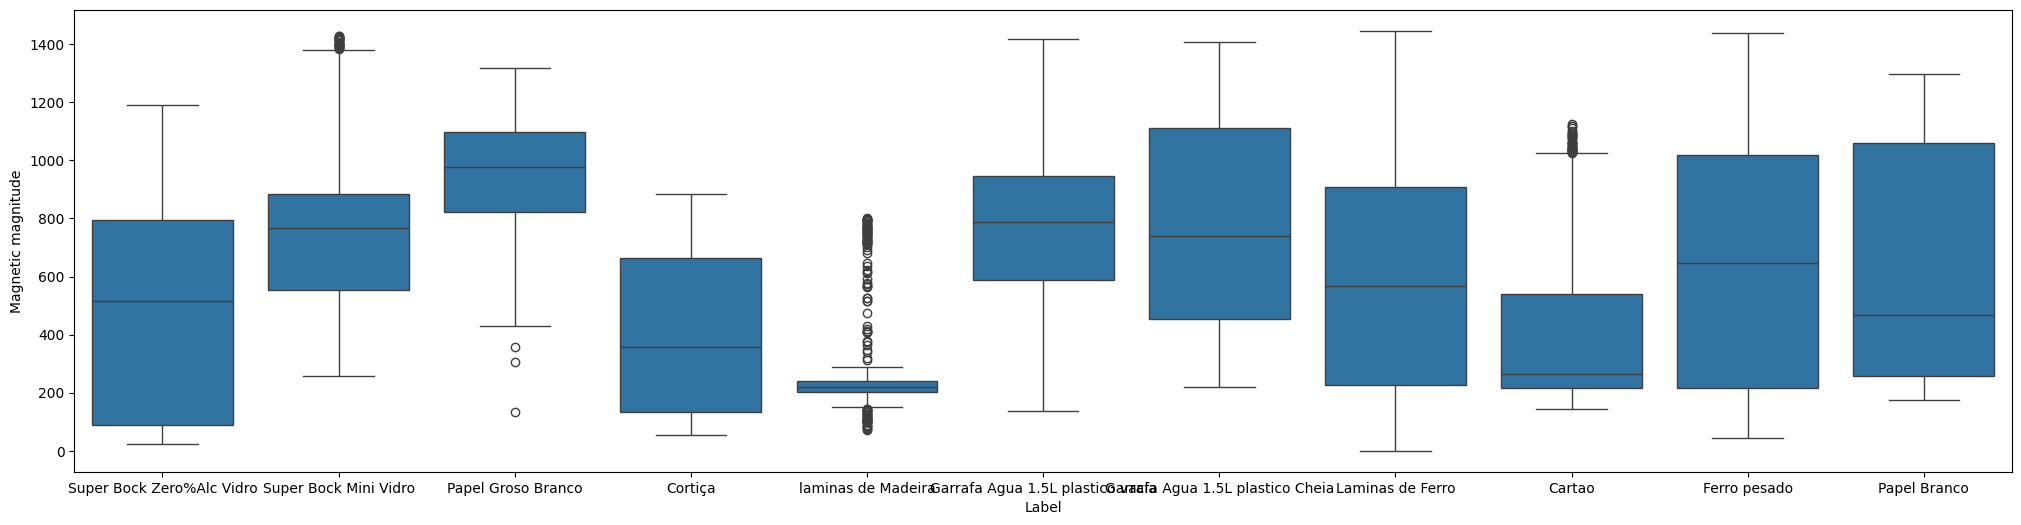

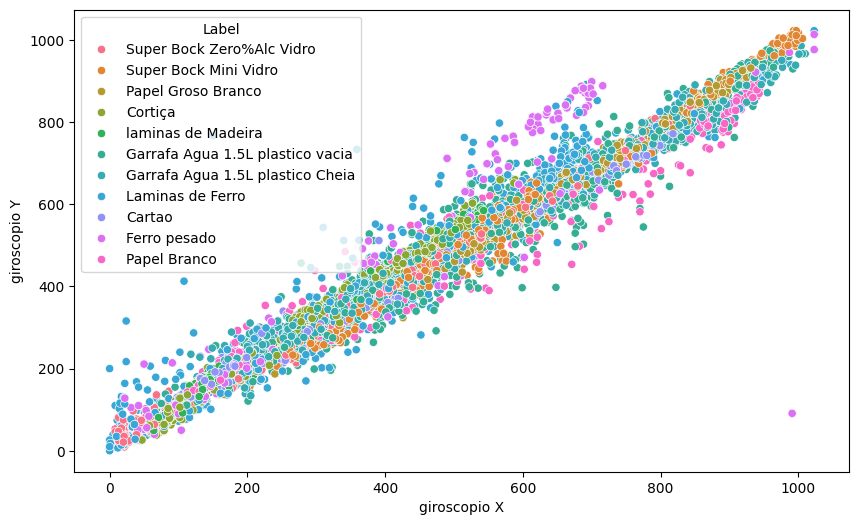

In [199]:
# EDA for the Magnetic magnitude feature for each label

import matplotlib.pyplot as plt
import seaborn as sns
    
plt.figure(figsize=(25, 6))
sns.boxplot(x='Label', y='Magnetic magnitude', data=df)
plt.show()

# scatterplot giroscope X vs giroscope Y
plt.figure(figsize=(10, 6))
sns.scatterplot(x='giroscopio X', y='giroscopio Y', hue='Label', data=df)
plt.show()



# Create transparency-color composite features

In [200]:
# # Create transparency-color composite features

# rgb_sum = df['Vermelho'] + df['Verde'] + df['Azul']

# # Transparency-Weighted Color Intensity
# # Transparency * (Color Channel / White Channel)
# # Transparency * Color Ratio
# df['T-Red'] = df['Transparencia'] * df['Red Ratio']
# df['T-Green'] = df['Transparencia'] * df['Green Ratio']
# df['T-Blue'] = df['Transparencia'] * df['Blue Ratio']

# # Transparency-Balanced Chromaticity
# df['Red Chroma'] = (df['Vermelho'] / (rgb_sum)) * df['Transparencia']
# df['Green Chroma'] = (df['Verde'] / (rgb_sum)) * df['Transparencia']
# df['Blue Chroma'] = (df['Azul'] / (rgb_sum)) * df['Transparencia']

# # Opacity-Color Contrast
# df['Contrast'] = df['Transparencia'] - (df['Branco'] / (rgb_sum + 1))


# df.head()

# Normalization

In [201]:
from sklearn.preprocessing import StandardScaler

features_to_scale = df.drop(columns=['Label']).columns   
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df.head()

,Transparencia,giroscopio X,giroscopio Y,Vermelho,Verde,Azul,Branco,Label,Magnetic magnitude
0,-1.027539,0.592453,0.574314,-0.981774,-0.731100,-0.814221,-0.713302,Super Bock Zero%Alc Vidro,0.583469
1,-1.030590,0.627964,0.522271,-0.769613,-0.731100,-0.433967,-0.562793,Super Bock Zero%Alc Vidro,0.576897
2,0.223345,-0.387674,-0.663565,-0.981774,-0.914788,-1.004347,-1.014318,Super Bock Mini Vidro,-0.522992
3,1.309479,0.908508,0.812225,0.715511,0.554715,0.516668,0.415511,Papel Groso Branco,0.863661
4,-0.893298,-1.332288,-1.451644,-0.345292,-0.547412,-0.624094,-0.487539,Cortiça,-1.401558


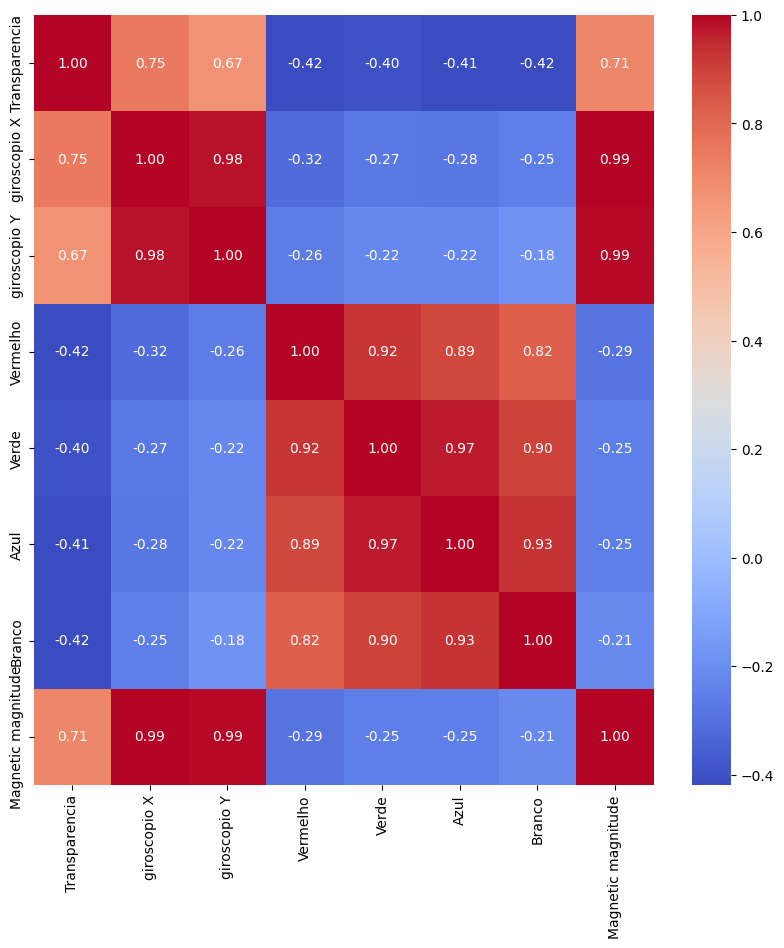

In [202]:
# Correlation matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

df_copy = df.copy().drop(columns=['Label'])

corr = df_copy.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Model Selection

Cross-val Accuracy: 0.78 (±0.00)
                                  precision    recall  f1-score   support

                          Cartao       0.85      0.97      0.90       117
                         Cortiça       0.98      1.00      0.99       115
                    Ferro pesado       0.51      0.87      0.64       113
Garrafa Agua 1.5L plastico Cheia       0.91      0.89      0.90       170
Garrafa Agua 1.5L plastico vacia       0.85      0.94      0.90       150
                Laminas de Ferro       0.90      0.06      0.11       148
                    Papel Branco       0.00      0.00      0.00        90
              Papel Groso Branco       0.91      0.98      0.95       117
           Super Bock Mini Vidro       0.78      0.98      0.87        93
       Super Bock Zero%Alc Vidro       0.97      0.86      0.91        69
              laminas de Madeira       0.46      1.00      0.63        82

                        accuracy                           0.77      1264
   

c:\Users\lmars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lmars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lmars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

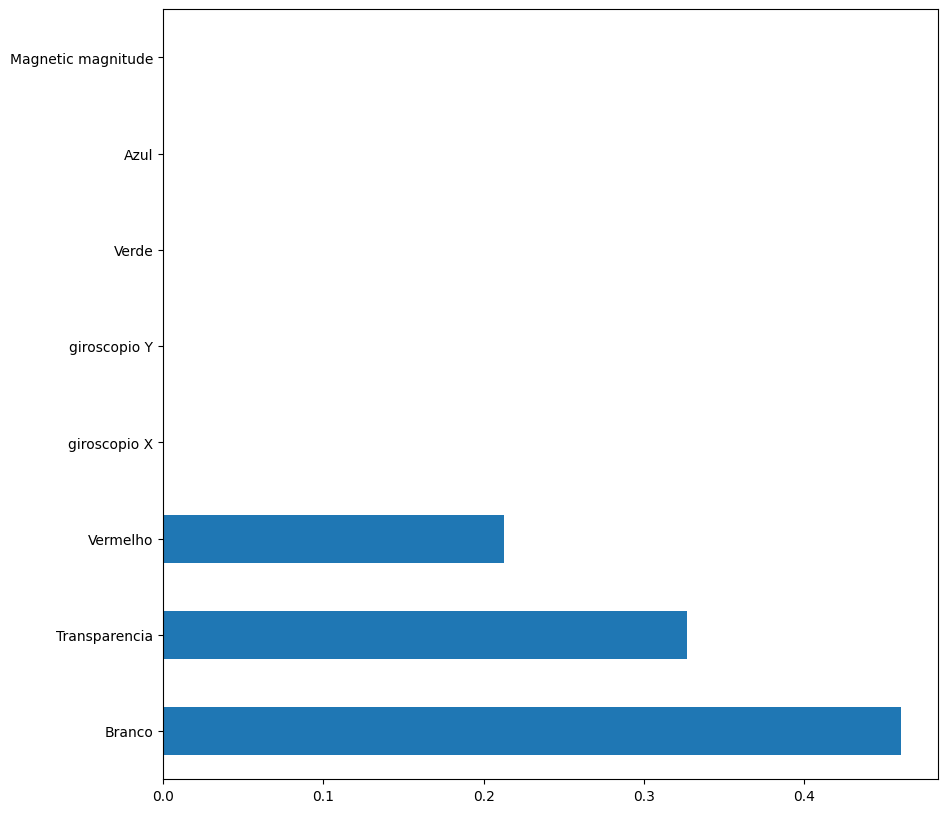

In [203]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Handle missing values by dropping rows with NaN values
df = df.dropna()

le = LabelEncoder()

df['Label'] = le.fit_transform(df['Label'])

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# clf = DecisionTreeClassifier(random_state=42)
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_impurity_decrease=0.01, class_weight="balanced", random_state=42)

cv_scores = cross_val_score(clf, X, y, cv=5)
print(f"Cross-val Accuracy: {cv_scores.mean():.2f} (±{cv_scores.std():.2f})")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Path:\n", tree_rules)

importance = pd.Series(clf.feature_importances_, index=X.columns)

# feature importance over 0.01
# importance = importance[importance > 0.01]

# plot feature importance
plt.figure(figsize=(10, 10))
importance.nlargest(20).plot(kind='barh')
plt.show()